# 심층 신경망(DNN) 훈련

심층 신경망에선 모델이 복잡해질수록 hidden layer의 개수가 많은 신경망 모델을 학습시켜야 한다. 하지만 이러한 깊은 모델을 학습시키는데에는 다음과 같은 문제가 발생할 확률이 높다.

- **그래디언트 소실**(vanishing gradient) 또는 **폭주**(exploding)가 발생할 수 있다.
- 모델이 복잡하고 커질수록 **학습시간이 매우 느려진다**.
- 모델이 복잡할수록 **오버피팅(overfitting)**될 위험이 크다.

## 그래디언트 소실과 폭주 문제

오차역전파에서 살펴보았듯이 역전파 알고리즘은 출력층(output layer)에서 입력층(input layer)로 오차 그래디언트(gradient)를 흘려 보내면서 각 뉴런의 입력값에 대한 손실함수의 그래디언트를 계산한다. 이렇게 계산된 그래디언트를 경사 하강법(gradient descent)단계에서 각 가중치 매개변수($\mathbf{W}$)를 업데이트 해준다.

하지만 아래의 그림과 같이 깊이가 깊은 심층신경망에서는 역전파 알고리즘이 입력층으로 전달됨에 따라 그래디언트가 점점 작아져 결국 가중치 매개변수가 업데이트 되지 않는 경우가 발생하게 된다. 이러한 문제를 **그래디언트 소실**(vanishing gradient)라고 한다.

![그래디언트 소실](https://github.com/GDGoC-SCHU/2024-ai-study/blob/main/week4/task1/png/%EA%B7%B8%EB%9E%98%EB%94%94%EC%96%B8%ED%8A%B8%EC%86%8C%EC%8B%A4.png?raw=true)


그래디언트 소실과는 반대로 역전파에서 그래디언트가 점점 커져 입력층으로 갈수록 가중치 매개변수가 기하급수적으로 커지게 되는 경우가 있는데 이를 **그래디언트 폭주**(exploding gradient)라고 하며, 이 경우에는 발산(diverse)하게되어 학습이 제대로 이루어지지 않는다.

## 활성화 함수

아래의 그림(출처: cs231n)에서 함수 $f$와 같이 입력 신호의 총합($\sum_{i}^{}{w_ix_i + b}$)을 출력 신호로 변환하는 함수를 **활성화 함수**(activation function)라고 한다.

![활성화 함수](https://github.com/GDGoC-SCHU/2024-ai-study/blob/main/week4/task1/png/%ED%99%9C%EC%84%B1%ED%99%94%ED%95%A8%EC%88%98.png?raw=true)





### - 시그모이드 함수

시그모이드 함수($\sigma$, sigmoid)는 대표적인 활성화 함수라고 할 수 있으며, 아래와 같은 식을 가지는 함수이다.
$$
\sigma(x) = \frac{1}{1+e^{-x}}
$$
시그모이드 함수는 다음과 같은 특성을 가진다.

- 입력 신호의 총합을 0에서 1사이의 값으로 바꿔준다.
- 입력 신호의 값이 커질수록(작아질수록) 뉴런의 활성화률(firing rate)이 $1$(작아질 경우 $0$)로 수렴(saturation)한다.

![시그모이드 함수](https://github.com/GDGoC-SCHU/2024-ai-study/blob/main/week4/task1/png/%EC%8B%9C%EA%B7%B8%EB%AA%A8%EC%9D%B4%EB%93%9C.png?raw=true)



하지만, 위와 같은 특성 때문에 시그모이드 함수는 2가지 문제가 있다.

- 입력의 절대값이 크게 되면 0이나 1로 수렴하게 되는데, 이러한 뉴런들은 **그래디언트를 소멸(kill) 시켜 버린다**. 그 이유는 수렴된 뉴런의 그래디언트 값은 0이기 때문에 역전파에서 0이 곱해지기 때문이다. 따라서, 역전파가 진행됨에 따라 아래 층(layer)에는 아무것도 전달되지 않는다.(시그모이드의 도함수는 $\sigma(1- \sigma)$이므로 함수의 값이 0이나 1에 가까우면 도함수의 결과가 매우 작아진다.)
- **원점 중심이 아니다(Not zero-centered)**.  따라서, 평균이 $0$이 아니라 $0.5$이며, 시그모이드 함수는 항상 양수를 출력하기 때문에 출력의 가중치 합이 입력의 가중치 합보다 커질 가능성이 높다. 이것을 편향 이동(bias shift)이라 하며, 이러한 이유로 **각 레이어를 지날 때마다 분산이 계속 커져** 가장 높은 레이어에서는 활성화 함수의 출력이 0이나 1로 수렴하게 되어 그래디언트 소실 문제가 일어나게 된다.

### - 하이퍼볼릭 탄젠트 함수(tanh)

하이퍼볼릭 탄젠트 함수(tanh, hyperbolic tangent)는 시그모이드 함수의 대체제로 사용할 수 있는 활성화 함수이며 아래와 같은 식을 갖는 함수이다.
$$
\begin{align*}
\text{tanh}(x) &= \frac{1-e^{-x}}{1+e^{-x}} \\ &= \frac{2}{1+e^{-2x}} -1
\end{align*}
$$
tanh함수는 시그모이드 함수($\sigma$)와 유사하며, 아래와 같이 시그모이드 함수를 이용해 tanh 함수를 나타낼 수 있다.

$$
\text{tanh}(x) = 2 \sigma(2x)-1
$$
tanh함수는 아래의 그림과 같이 입력값의 총합을 -1에서 1사이의 값으로 변환해 주며, 원점 중심(zero-centered)이기 때문에, 시그모이드와 달리 편향 이동이 일어나지 않는다. 하지만, tanh함수 또한 입력의 절대값이 클 경우 -1이나 1로 수렴하게 되므로 그래디언트를 소멸시켜 버리는 문제가 있다.

![탄젠트 함수](https://github.com/GDGoC-SCHU/2024-ai-study/blob/main/week4/task1/png/%ED%83%84%EC%A0%A0%ED%8A%B8.png?raw=true)


### - ReLU (Rectified Linear Unit)

ReLU(렐루, Rectified Linear Unit)는 시그모이드 계열과는 다른 활성화 함수이며,  아래의 식과 같이 입력이 0이상이면 입력을 그대로 출력하고, 0 이하이면 0을 출력하는 함수이다.
$$
\text{ReLU}(x) = \max(0, x)
$$
ReLU함수는 다음과 같은 특성을 가진다.

- 0 이상인 곳에서는 수렴하는 구간이 없다.
- 단순히 입력값을 그대로 출력으로 내보내기 때문에 시그모이드 함수에 비해 계산 속도가 빠르다.
- sigmoid/tanh에 비해 stochastic gradient descent(SGD)에서 수렴속도가 6배나 빠르다고 한다.

![렐루 함수](https://github.com/GDGoC-SCHU/2024-ai-study/blob/main/week4/task1/png/%EB%A0%90%EB%A3%A8.png?raw=true)

## 가중치 초기화 (Weight Initialization)

신경망 학습에서 중요한것 중 하나는 학습 시킬 때의 가중치 초기값이다. 가중치 초기값을 어떻게 초기화 하느냐에 따라 학습의 성능이 달라진다.

### - 가중치 초기값이 0이거나 동일한 경우

가중치의 초기값을 모두 0으로 초기화하거나 동일한 값으로 초기화할 경우 모든 뉴런의 동일한 출력값을 내보낸다. 그렇게 되면 역전파(backpropaation) 단계에서 각 뉴런이 모두 동일한 그래디언트 값을 가지게 된다. 학습이 잘 되려면, 각 뉴런이 가중치에 따라 비대칭(asymmetry, 어떤 뉴런은 가중치가 크고 어떤 뉴런은 가중치가 작게 되게끔)이어야 하는데 모든 뉴런이 동일한 그래디언트로 가중치 값이 변경되므로 뉴런의 개수가 아무리 많아도 뉴런이 하나뿐인 것처럼 작동하기 때문에 학습이 제대로 이루어지지 않는다.  따라서 가중치 초기값을 동일한 값으로 초기화 해서는 안 된다.

### - 작은 난수 (Small Random numbers) 인 경우

가중치 초기값은 작은 값으로 초기화 해야하는데 그 이유는 활성화 함수가 sigmoid일 경우 만약 가중치 초기값(절대값)을 큰 값으로 한다면 0과 1로 수렴하기 때문에 그래디언트 소실이 발생하게 된다. 또한 활성화 함수가 ReLU일 경우 절대값이 클 경우 음수일 때는 dead ReLU 문제가 발생하고 양수일 때는 그래디언트 폭주가 일어나게 된다.

따라서 가중치 초기값을 작게 초기화 해야하며 동일한 초기값을 가지지 않도록 랜덤하게 초기화 해야한다. 일반적으로 가중치 초기값은 평균이 0이고 표준편차가 0.01인 정규분포(가우시안 분포)를 따르는 값으로 랜덤하게 초기화 한다.

이러한 가중치 초기화 방법은 얕은 신경망에서는 괜찮게 작동할지 모르지만 신경망의 깊이가 깊어질수록 문제가 발생하게 된다. 예를 들어 평균이 0이고 표준편차가 0.01인 정규분포(가우시안 분포)를 따르는 값으로 랜덤하게 초기화하고 tanh를 활성화 함수로 사용하였을 경우, 아래의 차트처럼 첫번째 hidden layer를 제외한 나머지 레이어들이 모두 0을 출력하고 있는것을 확인할 수 있다. 따라서 모든 뉴런의 그래디언트 값이 동일하기 때문에 학습이 이루어지지 않게 된다.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ReLU
def ReLU(x):
    return np.maximum(0, x)

# tanh
def tanh(x):
    return np.tanh(x)

def weight_init(method=None):
    '''가중치 초기화 함수

    Args:
        - method: 가중치 초기화 방법(large, small, xavier, relu)
    Returns:
        - np.array형태의 가중치 초기값
    '''
    w = 0
    if method == 'large':
        w = np.random.randn(node_num, node_num) * 1
    elif method == 'small':
        w = np.random.randn(node_num, node_num) * 0.01
    elif method == 'xavier':
        w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)  # Xavier init
    elif method == 'he':
        w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)  # He init

    return w

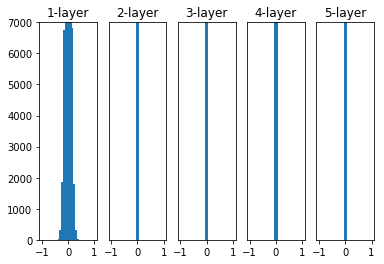

In [ ]:
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('small')
    a = np.dot(x, w)

    # z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(-1,1))
plt.show()

또한, 평균이 0이고 표준편차가 1인 정규분포를 따르는 값으로 랜덤하게 초기화하고 tanh를 활성화 함수로 사용하였을 경우에는 아래의 그림처럼 tanh의 출력이 -1과 1로 집중되면서 그래디언트 소실(vanishing gradient) 문제가 발생하게 된다.

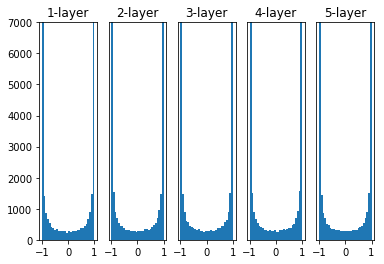

In [ ]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('large')
    a = np.dot(x, w)

    # z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(-1,1))
plt.show()

따라서, 작은 난수로 가중치를 초기화 하는 방법 또한 심층 신경망(DNN)에서는 적합하지 않다고 할 수 있다.

### - Xavier 초기화와 He 초기화

학습이 제대로 이루어지기 위해서는 각 뉴런의 활성화 함수 출력값이 고르게 분포되어 있어야 한다. 레이어와 레이어 사이에 다양한 데이터가 흘러야(forward, backprop) 신경망 학습이 효율적으로 이루어진다. 만약, 4.2에서와 같이 한쪽으로 치우친 데이터가 흐르게 되면 그래디언트 소실이나 모든 뉴런의 그래디언트 값이 동일해져 학습이 이루어지지 않는 문제가 발생한다.

#### Xavier Initialization

[Xavier Glorot과 Yoshua Bengio](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf)는 적절한 데이터가 흐르기 위해서는 각 레이어의 출력에 대한 분산이 입력에 대한 분산과 같아야 하며, 역전파에서 레이어를 통과하기 전과 후의 그래디언트 분산이 동일해야 한다고 주장했다.  Glorot과 Bengio는 'Understanding the Difficulty of Training Deep Feedforward Neural Networks'라는 논문에서 아래의 식과 같은 가중치 초기값을 제안했는 데, 이러한 초기화 방법을 **Xavier Initialization** 라고 한다.

Xavier 초기값은 **활성화 함수가 선형(linear)이라고 가정**한다. 아래의 그림에서 처럼 sigmoid 계열(sigmoid, tanh)의 활성화 함수는 좌우 대칭이며 가운데 부분이 선형인 함수로 볼 수 있다.

이러한 가정을 토대로 sigmoid 활성화 함수에서의 Xavier initialization 식은 다음과 같다.

- 평균이 0이고 표준편차 $\sigma = \sqrt{\frac{2}{n_{\text{inputs}} + n_{\text{outputs}}}}$ 인 정규분포
- 또는 $r = \sqrt{\frac{6}{n_{\text{inputs}} + n_{\text{outputs}}}}$ 일 때 $-r$과 $+r$ 사이의 균등분포
- 입력의 연결 개수와 출력의 연결 개수가 비슷할 경우 $\sigma = 1/\sqrt{n_{\text{inputs}}}$ 또는 $r = \sqrt{3} / \sqrt{n_{\text{inputs}}}$ 를 사용

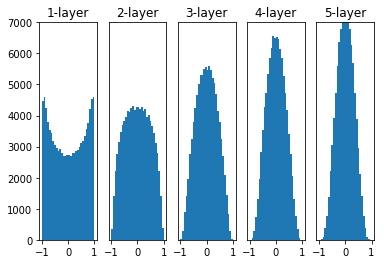

In [ ]:
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('xavier')
    a = np.dot(x, w)

    # z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(-1,1))
plt.show()

tanh 활성화 함수에 xavier 초기값을 설정했을 때, 4.2에서 작은 난수 초기화 했을 때보다 넓게 분포되어 있는것을 확인할 수 있다.

텐서플로에서는 이러한 Xavier 초기값을 쉽게 사용할 수 있도록 `tf.contrib.xavier_initializer`를 제공한다.

#### He Initialization

하지만 Xavier 초기값은 ReLU 활성화 함수에서는 아래의 그림처럼 레이어가 깊어질 수록 출력값이 0으로 치우치는 문제가 발생한다.

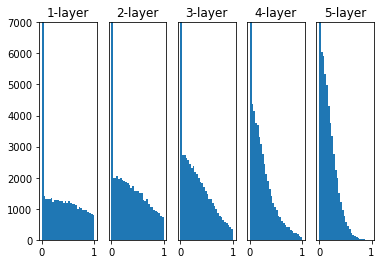

In [ ]:
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('xavier')
    a = np.dot(x, w)

    # z = sigmoid(a)
    z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

Kaiming He는 'Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classifcation' 논문에서 ReLU에 적합한 초기값을 제안했는 데, 이를 그의 이름을 따 **He 초기값**이라고 하며 다음과 같은 식이다.

- 평균이 0이고 표준편차 $\sigma = \sqrt{2} \cdot \sqrt{\frac{2}{n_{\text{inputs}} + n_{\text{outputs}}}}$인 정규분포
- 또는 $r = \sqrt{2} \cdot \sqrt{\frac{6}{n_{\text{inputs}} + n_{\text{outputs}}}}$ 일 때 $-r$과 $+r$ 사이의 균등분포
- 입력의 연결 개수와 출력의 연결 개수가 비슷할 경우 $\sigma = \sqrt{2}/\sqrt{n_{\text{inputs}}}$ 또는 $r = \sqrt{2} \cdot \sqrt{3} / \sqrt{n_{\text{inputs}}}$ 를 사용

위의 식에서 알 수있듯이, He 초기값은 Xavier 초기값에서 $\sqrt{2}$ 배 해줬다는 것을 확인할 수 있다. 그 이유는 ReLU는 입력이 음수일 때 출력이 전부 0이기 때문에 더 넓게 분포시키기 위해서이다.

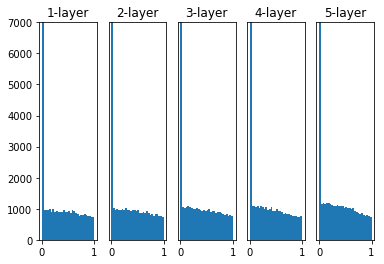

In [ ]:
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('he')
    a = np.dot(x, w)

    # z = sigmoid(a)
    z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

He 초기값 또한 텐서플로에서 쉽게 사용할 수 있도록 `tf.keras.initializers.he_normal`과 `tf.keras.initializers.he_uniform`을 제공한다.

## Set Up

In [ ]:
import os
import numpy as np
import tensorflow as tf

# 일관된 출력을 위해 유사난수 초기화
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
# matplotlib.rc('font', family='AppleGothic')  # MacOS
matplotlib.rc('font', family='Malgun Gothic')  # Windows
plt.rcParams['axes.unicode_minus'] = False

# 배치 정규화(BN, Batch Normalization)

심층 신경망 학습에서는 활성화 함수로는 ReLU를 사용하고 He 초기화를 통해 학습 초기 단계에서의 그래디언트 소실/폭주 문제를 줄일 수 있었지만, 이러한 문제가 학습하는 동안에 또 다시 발생할 가능성이 있다.

2015년 Sergety Ioffe와 Christian Szegedy는 ['Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift'](https://arxiv.org/pdf/1502.03167v3.pdf)라는 논문에서 **배치 정규화**(BN, Batch Normalization)를 제안했다.  배치 정규화는 각 층의 활성화 함수의 출력값 분포가 골고루 분포되도록 '강제'하는 방법으로, 각 층에서의 활성화 함수 출력값이 정규분포(normal distribution)를 이루도록 하는 방법이다.

즉 학습하는 동안 이전 레이어에서의 가중치 매개변수가 변함에 따라 활성화 함수 출력값의 분포가 변화하는 **내부 공변량 변화(Internal Covariate Shift) 문제를 줄이는 방법**이 바로 배치 정규화 기법이다.

배치 정규화는 아래의 그림과 같이 미니배치(mini-batch)의 데이터에서 각 feature(특성)별 평균($\mu$, mean)과 분산($\sigma^{2}$, variance)을 구한 뒤 정규화(normalize) 해준다.

![배치정규화](https://github.com/GDGoC-SCHU/2024-ai-study/blob/main/week4/task1/png/%EB%B0%B0%EC%B9%98%EC%A0%95%EA%B7%9C%ED%99%94.png?raw=true)


일반적으로 배치 정규화는 아래의 그림과 같이 Fully Connected(FC)나 Convolutional layer 바로 다음, 활성화 함수를 통과하기 전에 배치 정규화(BN)레이어를 삽입하여 사용한다.

![배치정규화 레이어](https://github.com/GDGoC-SCHU/2024-ai-study/blob/main/week4/task1/png/%EB%B0%B0%EC%B9%98%EC%A0%95%EA%B7%9C%ED%99%94_%EB%A0%88%EC%9D%B4%EC%96%B4.png?raw=true)


배치 정규화는 미니배치(mini-batch)를 단위로 데이터의 분포가 평균($\mu$, mean)이 0, 분산($\sigma^{2}$, variance)이 1이 되도록 정규화(normalization)한다.  수식은 다음과 같다.

- **Input** : 미니배치 $B = \{ x_1, x_2, \dots, x_m \}$ 개의 입력 데이터, 학습 될 파라미터인 $\gamma, \beta$
- **Output** : $\{ y_i = \text{BN}_{\gamma, \beta}(x_i) \}$

$$
\begin{eqnarray*} \mu _{ B } & \leftarrow  & \frac { 1 }{ m } \sum _{ i=1 }^{ m }{ x_{ i } } & \text{// mini-batch mean}  \\ \sigma _{ B }^{ 2 } & \leftarrow  & \frac { 1 }{ m } \sum _{ i=1 }^{ m }{ \left( x_{ i }-\mu _{ B } \right) ^{ 2 } } & \text{// mini-batch variance}  \\ \hat { x } _{ i } & \leftarrow  & \frac { x_{ i }-\mu _{ B } }{ \sqrt { \sigma _{ B }^{ 2 }+\varepsilon }} & \text{// normalize} \\ y_{i} & \leftarrow & \gamma \hat{x}_{i} + \beta \equiv \text{BN}_{\gamma, \beta}(x_i) & \text{// scale and shift} \end{eqnarray*}
$$

- $\mu_B$ : 미니배치 $B$에 대한 평균
- $\sigma_B$ : 미니배치 $B$에 대한 표준편차
- $m$ : 미니배치 데이터 개수
- $\hat{x}_i$ : 평균이 0, 분산이 1로 정규화된 입력 데이터
- $\gamma$ : 정규화된 데이터에 대한 스케일(scale) 조정 파라미터
- $\beta$ : 정규화된 데이터에 대한 이동(shift) 조정 파라미터
- $\varepsilon$ : 분모가 0이 되는 것을 막기 위한 작은 숫자 ($10^{-5}$)
- $y_i$ : $\text{BN}$ 연산의 출력 결과

### - Scale($\gamma$)과 Shift($\beta$)를 해주는 이유

위의 식에서 입력 데이터($x_i$)에 대해 정규화(normalization, $\hat{x}_i = \frac{x_i - \mu_B}{\sqrt{\sigma_{B}^{2}+\varepsilon}}$)를 하게 되면, $\hat{x}_i$의 값이 대부분 0에 가까운 값이 될 것이다. 만약, 이러한 정규화된 입력 데이터 $\hat{x}_{i}$가 시그모이드(sigmoid) 활성화 함수의 입력값으로 들어가게 되면, 비선형(nonlinearity) 함수인 sigmoid가 선형(linearity)구간에 빠지게 된다(sigmoid 함수는 0 부근에서 선형성을 띤다). 이러한 문제를 해결하기 위해서 아래의 식과 같이 정규화된 입력 데이터 $x_i$에 scaling과 shifting해주는 $\gamma$와 $\beta$를 적용 해준다.

$$
y_i = \gamma \hat{x}_i + \beta
$$


 $\gamma$와 $\beta$를 다르게 표현하면 $\hat{x}_i$에 대한 가중치($\gamma$) 와 편향(bias, $\beta$)라고 볼 수 있으며,  $\gamma$와 $\beta$는 초기값으로 $\gamma=1, \beta=0$으로 시작해(즉, 초기에는 입력값 그대로 학습), 학습 과정에서 역전파(backprop)에 의해 적합한 값으로 조정된다.

### - 테스트 단계에서의 BN

테스트 단계(추론 단계처럼 데이터가 하나씩 주입된다고 가정)나 추론 단계에서는 평균($\mu_B$)과 표준편차($\sigma_{B}$)를 계산할 미니배치가 없기 때문에 전체 Training Set의 평균과 표준편차를 사용한다. 하지만, 엄청나게 많은 전체 Training set에 대한 평균과 표준편차를 계산하기에는 무리기 때문에, 아래의 식과 같이 각 $n$개의 미니배치에 대한 평균과 표준편차를 이용해 전체 Training Set의 평균과 표준편차를 대신한다.
$$
\begin{align*}
\hat{\mu} &= \frac{1}{n} \sum_{i=1}^{n}{\mu_{B}^{(i)}} \\ \hat{\sigma} &= \frac{1}{n} \sum_{i=1}^{n}{\sigma_{B}^{(i)}}
\end{align*}
$$


위와 같은 방법 대신, 모델 학습 단계에서 **지수 감소**(exponential decay) 이동 평균법(moving average)을 사용하여 평균과 표준편차를 계산할 수 있다.


$$
\begin{align*}
\hat{\mu} & \leftarrow \alpha \hat{\mu} + \left(1 - \alpha \right)\mu_{B}^{(i)} & \text{// moving mean}\\ \hat{\sigma} & \leftarrow \alpha \hat{\sigma} + \left( 1 - \alpha \right) \sigma_{B}^{(i)} & \text{// moving stddev}
\end{align*}
$$


위의 식에서 $\alpha$는 모멘텀(momentum)값으로 일반적으로 1에 가까운 0.9, 0.99, 0.999로 설정한다.  이러한 moving mean과 moving stddev는 학습 단계에서 매 미니배치마다 업데이트 해준다.

### - 배치 정규화의 장점

Batch Normalization(BN)은 논문에서 실험했던 모든 DNN의 성능이 크게 향상 시켰다. BN은 다음과 같은 장점들이 있다.

- tanh나 sigmoid 같은 활성화 함수에 대해 그래디언트 소실(vanishing gradient)문제가 감소한다.
- 가중치 초기화에 덜 민감하다. 가중치 초기값에 크게 의존하지 않기 때문에 가중치 초기화 기법에 대해 크게 신경 쓰지 않아도 된다.
- 학습률(learning rate)를 크게 잡아도 gradient descent가 잘 수렴한다.
- 오버피팅을 억제한다. BN이 마치 Regularization 역할을 하기 때문에 드롭아웃(Dropout)과 같은 규제기법에 대한 필요성이 감소한다.  하지만, BN로 인한 규제는 효과가 크지 않기 때문에 드롭아웃을 함께 사용하는 것이 좋다.

# 텐서플로에서 Batch Normalization 구현하기

텐서플로(TensorFlow)에서는 `tf.nn.batch_normalization()`과 `tf.layers.batch_normalization()`을 통해 두 개의 Batch Normalization을 제공한다. 하지만, `tf.nn.batch_normalization`은 평균과 표준편차(학습할 때는 미니배치, 테스트할 때는 전체 데이터셋)를 직접 계산한 뒤 인자로 전달해줘야 하며, scaling과 shifting을 위한 $\gamma, \beta$를 만들어 줘야한다. 반면, `tf.layers.batch_normalization`은 이러한 작업들을 모두 처리해 주기 때문에 이것을 사용하는 것이 좋다.

이제, `tf.layers.batch_normalization`을 이용하여 MNIST 데이터셋을 분류하는 DNN을 구현해 보도록 하자. DNN의 구성은 아래의 그림과 같이 784개의 입력층(input) → 300개 노드의 은닉층(hidden1) → 100개 노드의 은닉층(hidden2) → 10개의 출력층(output)으로 구성되어 있다.   

![배치정규화 텐서플로](https://github.com/GDGoC-SCHU/2024-ai-study/blob/main/week4/task1/png/%EB%B0%B0%EC%B9%98%EC%A0%95%EA%B7%9C%ED%99%94_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C.png?raw=true)



### 1. MNIST DataSet Load

먼저, 학습과 테스트에 사용할 MNIST 데이터셋을 로드한 뒤 랜덤하게 미니배치 크기만큼 가져오기 위한 `shuffle_batch()` 함수를 구현한다.

In [ ]:
import tensorflow as tf

# MNIST Load
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

# Train & TestSet reshape
train_x = train_x.astype(np.float32).reshape(-1, 28*28) / 255.
train_y = train_y.astype(np.int32)
test_x = test_x.astype(np.float32).reshape(-1, 28*28) / 255.
test_y = test_y.astype(np.int32)

# Split Validation set from Train set
valid_x, train_x = train_x[:5000], train_x[5000:]
valid_y, train_y = train_y[:5000], train_y[5000:]

In [ ]:
def shuffle_batch(inputs, labels, batch_size):
    rnd_idx = np.random.permutation(len(inputs))
    n_batches = len(inputs) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        batch_x, batch_y = inputs[batch_idx], labels[batch_idx]
        yield batch_x, batch_y

### 2. NN 구성하기

`tf.layers.batch_normalization()`처럼 배치 정규화가 반복해서 사용하기 때문에 코드 중복을 줄이기 위해 Python의 내장 모듈인 `functools`모듈 안에 있는 `partial()`함수를 사용해서 배치 정규화를 적용한다.

`tf.layers.batch_normalization`로 배치 정규화를 사용할 경우, '1.2 테스트(추론) 단계에서의 BN'에서 살펴본 moving mean과 moving variance를 업데이트를 해주기 위해 `tf.GraphKeys.UPDATE_OPS`를 사용해야 한다.

In [ ]:
from functools import partial

reset_graph()
################
# layer params #
################
n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10
batch_norm_momentum = 0.9

# input layer
inputs = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
# output layer
labels = tf.placeholder(tf.int32, shape=[None], name='labels')
# BN에 사용하기 위한 학습 유무
training = tf.placeholder_with_default(False, shape=[], name="training")

with tf.name_scope('dnn'):
    # batch normalization layer using partial
    batch_norm_layer = partial(
            tf.layers.batch_normalization,
            training=training,
            momentum=batch_norm_momentum)

    # 1st - hidden
    hidden1 = tf.layers.dense(inputs, n_hidden1, name="hidden1")
    # batch norm
    bn1 = batch_norm_layer(hidden1)
    # activation function
    bn1_act = tf.nn.elu(bn1)

    # 2nd - hidden
    hidden2 = tf.layers.dense(bn1_act, n_hidden2, name="hidden2")
    bn2 = batch_norm_layer(hidden2)
    bn2_act = tf.nn.elu(bn2)

    # outputs
    logits_before_bn = tf.layers.dense(bn2_act, n_outputs, name="outputs")
    logits = batch_norm_layer(logits_before_bn)

with tf.name_scope('loss'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels, logits=logits)
    loss = tf.reduce_mean(xentropy, name='loss')


################
# Hyper-params #
################
learning_rate = 0.01
n_epochs = 5
batch_size = 50

# moving mean & variance update
update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(update_ops):
    with tf.name_scope('train'):
        optimizer = tf.train.GradientDescentOptimizer(learning_rate)
        train_op = optimizer.minimize(xentropy)

with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(logits, labels, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

### 3. 학습


In [ ]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()

    for epoch in range(n_epochs):
        for batch_x, batch_y in shuffle_batch(train_x, train_y, batch_size):
            sess.run(train_op, feed_dict={inputs: batch_x,
                                          labels:batch_y,
                                          training: True})

        # validation
        accuracy_val = accuracy.eval(feed_dict={inputs: valid_x, labels: valid_y})
        print('epoch: {:03d}, valid. Acc: {:.4f}'.format(epoch, accuracy_val))

epoch: 000, valid. Acc: 0.9582
epoch: 001, valid. Acc: 0.9728
epoch: 002, valid. Acc: 0.9740
epoch: 003, valid. Acc: 0.9790
epoch: 004, valid. Acc: 0.9798


# Task1:

In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, ReLU, Dropout

# 배치 정규화를 포함한 딥러닝 모델 정의 함수
def create_model():
    model = Sequential([
        # TODO: 첫 번째 Dense 층(유닛 수: 256)과 적절한 입력 형태를 추가하세요.
        #

        # TODO: 첫 번째 Dense 층 다음에 배치 정규화를 추가하세요.
        #

        # TODO: 첫 번째 배치 정규화 다음에 ReLU 활성화 함수를 추가하세요.
        #

        # TODO: 유닛 수가 128인 Dense 층을 추가하세요.
        #

        # 해당 층에 배치 정규화와 ReLU를 추가합니다.
        #
        #

        # TODO: 드롭아웃 층(드롭아웃 비율: 0.3)을 추가하세요.
        #

        # TODO: 유닛 수가 64인 Dense 층을 추가하세요.
        #

        # 해당 층에 배치 정규화와 ReLU를 추가합니다.
        #

        # TODO: 유닛 수가 10인 출력층(Dense)과 softmax 활성화 함수를 추가하세요.
        #

    ])
    return model

# MNIST 데이터셋을 로드하고 전처리합니다.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# TODO: 데이터 형태를 (784,)로 변환하고, 0~1 범위로 정규화하세요.
#
#

# TODO: Adam 옵티마이저, sparse categorical crossentropy 손실 함수, accuracy 메트릭으로 모델을 컴파일하세요.
model = create_model()
model.compile(
    #
    #
    #
)

# TODO: 배치 크기를 64로, 에포크 수를 5로 설정하여 모델을 훈련하세요.
#


# TODO: 모델을 평가하고 테스트 정확도를 출력하세요.
#
